# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


In this exercise, we consider the **traveling salesman problem**. It consists in finding a way to connect $N$ cities $\vec{c}_1, \dots, \vec{c}_N$ in a 2D plane such that the total length of the route is minimized. The start city should coincide with the final city and each city must be visited exactly once. As a measure of the total length of the journey, we use:

$$ L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|, $$

where the $\vec{x}_i$ are one particular permutation of the cities and $\vec{x}_{N+1} = \vec{x}_{1}$ as each city has to be visited exactly once.

Here, we choose $N=32$ cities that are either positioned on the circumeference of a circle with unit radius or inside a square with side length $2$. In order to solve the problem of minimizing the route of the traveling salesman under these conditions, we apply a **genetic algorithm**.

In our case, the genetic algorithm has the following form:

1. Create a starting population with $N_{pop}$ individuals. Each of the $(N-1)!$ routes (we fix the starting city to reduce redundant permutations) is assigned with equal probability to the individuals.
2. 

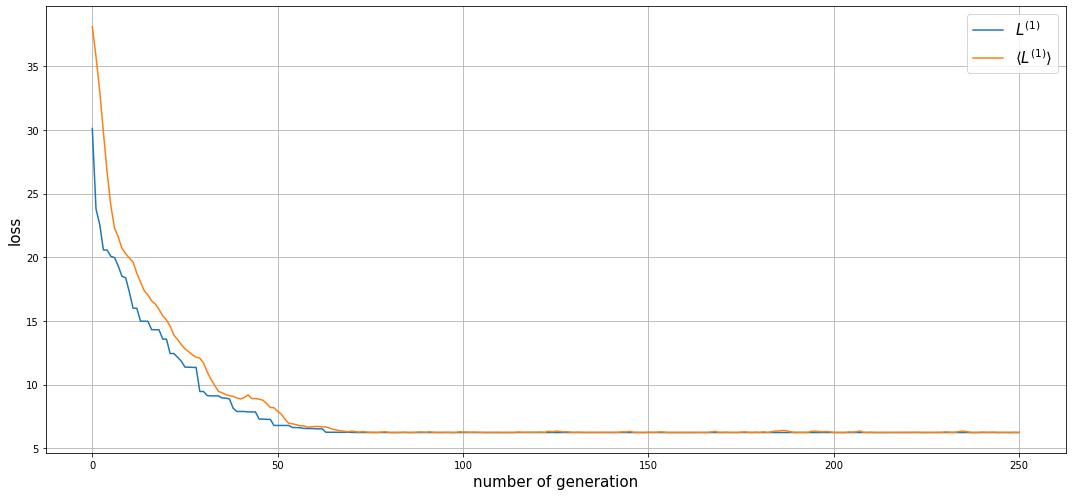

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_loss(path):
    """
    Plot L1 loss for mean of best half and for best path against the number of generations.
    """
    
    plt.figure(figsize=(15, 7))
    
    ngen, loss_best, loss_mean = np.loadtxt(path, delimiter=",", unpack=True, skiprows=1)
    plt.plot(ngen, loss_best, label=r"$L^{(1)}}$")
    plt.plot(ngen, loss_mean, label=r"$\langle L^{(1)} \rangle$")
    
    plt.xlabel("number of generation", size=15)
    plt.ylabel("loss", size=15)
    plt.legend(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.show()
                                                                                                    
plot_loss("data/circle/l1.txt")

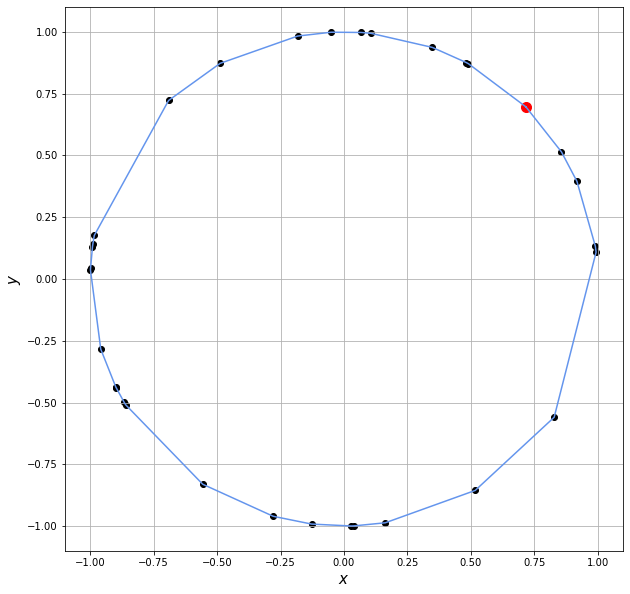

In [20]:
def plot_best(path):
    """
    Plot of best path.
    """
    
    # load data
    x, y = np.loadtxt(path + "map.txt", unpack=True, delimiter=",", skiprows=1)
    best_path = np.loadtxt(path + "l1_path.txt", delimiter=",", dtype=int)[-1]
    
    # insert start and end city (fixed for all individuals)
    best_path = np.insert(best_path, 0, 0, axis=0)
    best_path = np.append(best_path, 0)
    
    plt.figure(figsize=(10, 10))
    
    plt.scatter(x, y, marker="o", color="k")
    plt.scatter(x[0], y[0], marker="o", color="r", s=100)
    plt.plot(x[best_path], y[best_path], color="cornflowerblue")
    
    plt.xlabel("$x$", size=15)
    plt.ylabel("$y$", size=15)
    
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    plt.grid()
    plt.show()
    
plot_best("data/circle/")

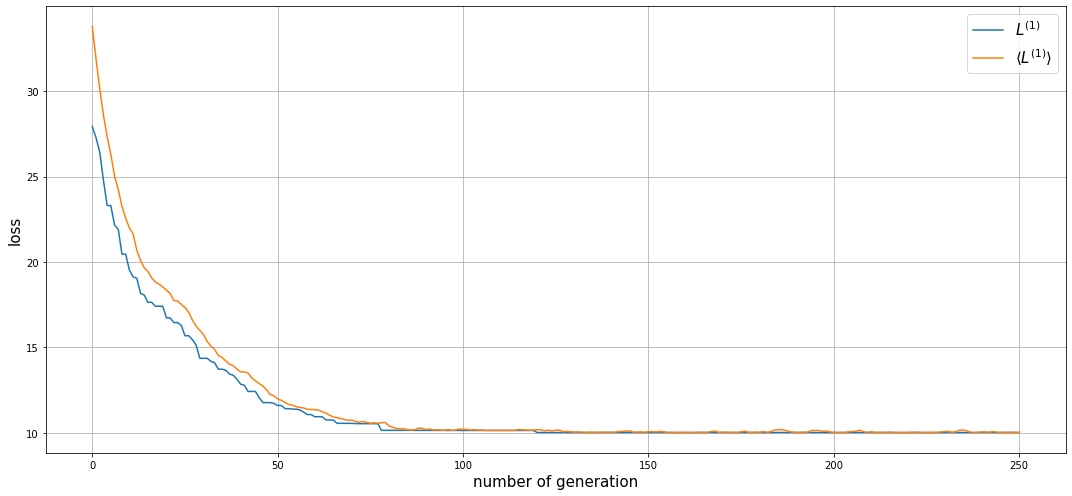

In [18]:
plot_loss("data/square/l1.txt")

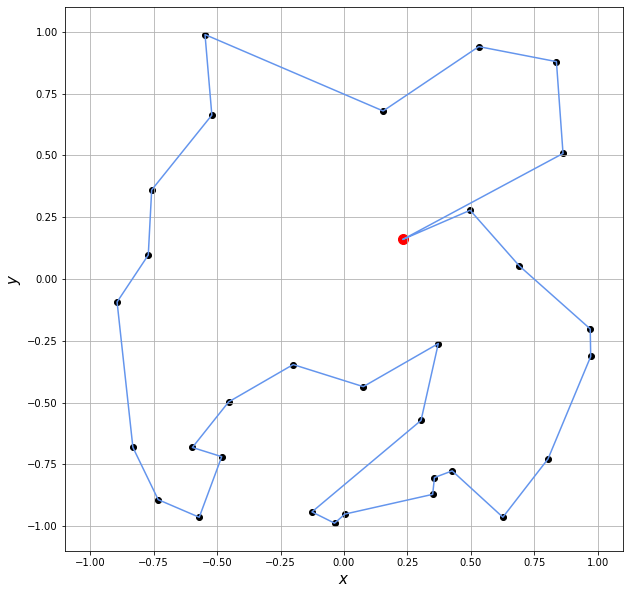

In [17]:
plot_best("data/square/")